In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Garbage_Detection/garbage_classification/'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [4]:
DATADIR = '/content/drive/MyDrive/Garbage_Detection/garbage_classification/'
CATEGORIES = ['battery','biological','brown-glass','cardboard','clothes','green-glass','metal','paper','plastic','shoes','trash','white-glass']
IMG_SIZE=100

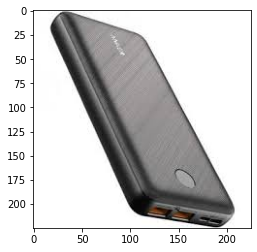

In [5]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [6]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [7]:
print(len(training_data))

19512


In [8]:
lenofimage = len(training_data)

In [9]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
#X = tf.keras.utils.normalize(X, axis = 1)

In [10]:
X.shape

(19512, 30000)

Flattening the arrays

In [11]:
X = X/255.0

Ex. of flattened array...

In [12]:
X[1]

array([1., 1., 1., ..., 1., 1., 1.])

In [13]:
y=np.array(y)

In [14]:
y.shape

(19512,)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

KNN

In [16]:
# since its a multi-class prediction, in order to prevent error we need some library
from sklearn.multiclass import OneVsRestClassifier
# Importing KNN library
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = OneVsRestClassifier(KNeighborsClassifier())

In [18]:
knn.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [19]:
# predict for one observation
knn.predict(X_test[0].reshape(1,-1))

array([2])

In [20]:
# predict for multiple observation (images) at once
knn.predict(X_test[0:10])

array([ 2,  3, 10,  8, 10,  9,  8, 11, 10,  3])

In [21]:
# make prediction on entire test data
predictions = knn.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix # metrics error
%time
print('KNN Accuracy: %.3f' % accuracy_score(y_test,predictions))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
KNN Accuracy: 0.355
